In [5]:
# Import required packages for this chapter
from pathlib import Path

import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib.pylab as plt

%matplotlib inline

In [6]:
imdb_df = pd.read_csv('projectData.csv')
imdb_df = imdb_df.set_index('tconst')

imdb_df = imdb_df.drop('numVotes', axis=1)
imdb_df = imdb_df.drop('writers', axis=1)

In [7]:
genres_df = imdb_df['genres'].str.get_dummies(sep=',')
genres_df = genres_df.add_prefix('genre_')
imdb_df = pd.concat([imdb_df, genres_df], axis=1)
imdb_df = imdb_df.drop('genres', axis=1)


directors_df = imdb_df['directors'].str.get_dummies(sep=',')
directors_df = directors_df.add_prefix('dir_')
imdb_df = pd.concat([imdb_df, directors_df], axis=1)
imdb_df = imdb_df.drop('directors', axis=1)


actor_df = imdb_df['actor'].str.get_dummies(sep=',')
actor_df = actor_df.add_prefix('actor_')
imdb_df = pd.concat([imdb_df, actor_df], axis=1)
imdb_df = imdb_df.drop('actor', axis=1)

In [8]:
# define the bins
bins = [0, 2.4, 5.0, 7.4, 10]

# define the bin labels
labels = ['Terrible', 'Poor', 'Average', 'Excellent']

# create a new column with the bin labels
imdb_df['binRating'] = pd.cut(imdb_df['averageRating'], bins=bins, labels=labels, include_lowest=True)

imdb_df = imdb_df.drop('averageRating', axis=1)
imdb_df = pd.get_dummies(imdb_df, columns=['binRating'], prefix='bin')
imdb_df.head()

,runtimeMinutes,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,...,actor_nm9500254,actor_nm9503133,actor_nm9576872,actor_nm9858131,actor_nm9862858,actor_nm9877392,bin_Terrible,bin_Poor,bin_Average,bin_Excellent
tconst,,,,,,,,,,,,,,,,,,,,,
tt0035423,118,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tt0118589,104,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
tt0118694,98,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
tt0120202,105,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
tt0120630,84,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


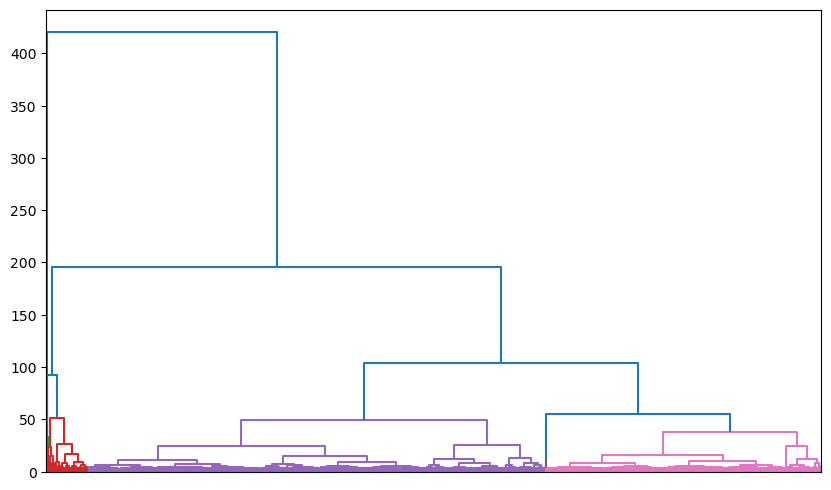

In [9]:
# Reduce to continuous measurements and normalize data
reduced_df = imdb_df.drop(columns=['bin_Average', 'bin_Excellent', 'bin_Poor', 'bin_Terrible'])

# Hierarchical clustering using complete linkage and Euclidean distance 
Z = linkage(reduced_df, method='complete', metric='euclidean')
fig = plt.figure(figsize=(10, 6))
dendrogram(Z, no_labels=True, color_threshold=55)
plt.show()

In [21]:
# try splitting into different number of clustesr
memb = fcluster(Z, 30, criterion='maxclust')
np.unique(memb, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int32),
 array([  1,   1,   1,   1,   2,   5,   1,   3,  21,  17,  40,  55,  53,
         60, 408, 653, 358, 653, 155, 342,  77, 171,   2,   1, 721, 405,
        349,   6, 166,  49]))

In [22]:
np.unique(fcluster(Z, 4, criterion='maxclust'), return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([   3,    1,  257, 4516]))

In [23]:
centroids = {}
for key, item in reduced_df.groupby(memb):
    centroids['Cluster {}'.format(key)] = item.mean()

pd.DataFrame(centroids).round(2)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 21,Cluster 22,Cluster 23,Cluster 24,Cluster 25,Cluster 26,Cluster 27,Cluster 28,Cluster 29,Cluster 30
runtimeMinutes,288.0,321.0,366.0,467.0,241.0,211.6,224.0,198.33,180.10,188.12,...,146.96,140.37,54.5,46.0,97.96,93.02,88.93,67.67,84.41,79.43
genre_Action,1.0,1.0,0.0,0.0,0.5,0.2,0.0,0.33,0.67,0.53,...,0.49,0.46,0.0,0.0,0.27,0.19,0.22,0.00,0.21,0.12
genre_Adventure,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.33,0.24,0.18,...,0.23,0.27,0.0,0.0,0.19,0.22,0.21,0.50,0.23,0.31
genre_Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,1.0,0.07,0.13,0.12,0.83,0.16,0.37
genre_Biography,0.0,0.0,0.0,1.0,0.0,0.2,0.0,0.00,0.10,0.12,...,0.04,0.12,0.0,0.0,0.04,0.04,0.01,0.00,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actor_nm9503133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
actor_nm9576872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
actor_nm9858131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
actor_nm9862858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
for key, item in imdb_df.groupby(memb):
    print('Cluster {}'.format(key))
    print(item['bin_Excellent'].value_counts().sort_index())

Cluster 1
0    1
Name: bin_Excellent, dtype: int64
Cluster 2
1    1
Name: bin_Excellent, dtype: int64
Cluster 3
1    1
Name: bin_Excellent, dtype: int64
Cluster 4
1    1
Name: bin_Excellent, dtype: int64
Cluster 5
0    1
1    1
Name: bin_Excellent, dtype: int64
Cluster 6
0    1
1    2
Name: bin_Excellent, dtype: int64
Cluster 7
0    1
1    1
Name: bin_Excellent, dtype: int64
Cluster 8
1    1
Name: bin_Excellent, dtype: int64
Cluster 9
0    1
1    2
Name: bin_Excellent, dtype: int64
Cluster 10
0    10
1    11
Name: bin_Excellent, dtype: int64
Cluster 11
0    1
1    3
Name: bin_Excellent, dtype: int64
Cluster 12
0    5
1    8
Name: bin_Excellent, dtype: int64
Cluster 13
0    6
1    5
Name: bin_Excellent, dtype: int64
Cluster 14
0    11
1    18
Name: bin_Excellent, dtype: int64
Cluster 15
0     8
1    11
Name: bin_Excellent, dtype: int64
Cluster 16
0    16
1    20
Name: bin_Excellent, dtype: int64
Cluster 17
0    27
1    26
Name: bin_Excellent, dtype: int64
Cluster 18
0    33
1    27
Name